# 2. Detecting facial expressions from images

*Written by Jin Hyun Cheong and Eshin Jolly*

In this tutorial we'll explore the `Detector` class in more depth, demonstrating how to detect faces, facial landmarks, action units, and emotions from images. You can try it out interactively in Google Collab: [![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/cosanlab/py-feat/blob/master/notebooks/content/02_detector_imgs.ipynb)

In [ ]:
# Uncomment the line below and run this only if you're using Google Collab
# !pip install -q py-feat

## 2.1 Detecting a single face from a single image

### Setting up the Detector

When using the `Detector` you can either specify specific models to use or just load the default models which are defined explicitly below:

In [26]:
from feat import Detector

detector = Detector(
    face_model="img2pose",
    landmark_model="mobilefacenet",
    au_model="rf",
    emotion_model="resmasknet",
    facepose_model="img2pose"
)

detector

feat.detector.Detector(face_model=img2pose, landmark_model=mobilefacenet, au_model=rf, emotion_model=resmasknet, facepose_model=img2pose)

Let's process a single image with a single face. Py-feat includes a demo image for this purpose called `single_face.jpg` so lets use that. You can also use the convenient `imshow` function which will automatically load an image into a numpy array if provided a path unlike matplotlib:

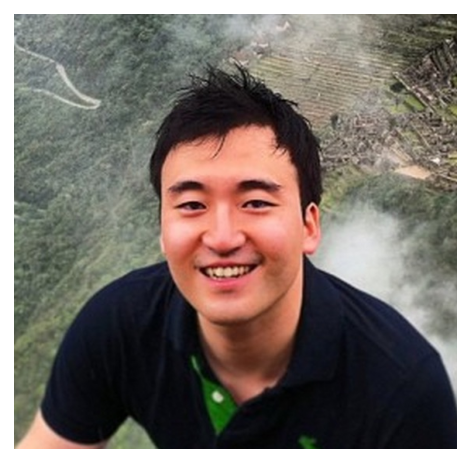

In [2]:
from feat.utils import get_test_data_path
from feat.plotting import imshow
import os

# Helper to point to the test data folder
test_data_dir = get_test_data_path()

# Get the full path
single_face_img_path = os.path.join(test_data_dir, "single_face.jpg")

# Plot it
imshow(single_face_img_path)

Now we use our initialized `detector` instance to make predictions with the `detect_image()` method. This is the main workhorse method that will perform face, landmark, au, and emotion detection using the loaded models. It always returns a `Fex` data instance:

In [27]:
single_face_prediction = detector.detect_image(single_face_img_path)

# Show results
single_face_prediction

frame FaceRectX FaceRectY FaceRectWidth FaceRectHeight FaceScore  \
0     0     186.0     139.0         206.0          268.0  0.989396   

          x_0         x_1         x_2         x_3  ...      Roll       Yaw  \
0  188.479571  189.470731  192.234394  197.284821  ... -3.809027  6.605721   

      anger   disgust      fear happiness   sadness  surprise   neutral  \
0  0.000224  0.000032  0.000348  0.989694  0.000038  0.009612  0.000053   

                                               input  
0  /Users/Esh/Documents/pypackages/py-feat/feat/t...  

[1 rows x 173 columns]

### Working with Fex data class results

Because the output is a `Fex` data class instance, we can utilize its various helper methods and attributes to inspect our predictions.

#### Easily accessing FEX columns of interest.  

Fex data classes make it simple to access various columns of interest (AUs, emotion, faceboxes, etc): 

In [28]:
single_face_prediction.facebox

FaceRectX FaceRectY FaceRectWidth FaceRectHeight FaceScore
0     186.0     139.0         206.0          268.0  0.989396

In [29]:
single_face_prediction.aus

AU01      AU02      AU04      AU05      AU06      AU07      AU09  \
0  0.545865  0.547656  0.199392  0.164312  0.868928  0.664857  0.287681   

       AU10    AU11      AU12      AU14      AU15      AU17      AU20  \
0  0.910192  0.4151  0.950743  0.641075  0.253692  0.248751  0.244627   

       AU23      AU24    AU25      AU26      AU28      AU43  
0  0.245669  0.025991  0.9651  0.397475  0.177263  0.101255

In [30]:
single_face_prediction.emotions

anger   disgust      fear happiness   sadness  surprise   neutral
0  0.000224  0.000032  0.000348  0.989694  0.000038  0.009612  0.000053

In [31]:
single_face_prediction.facepose # (in degrees)

Pitch      Roll       Yaw
0  0.832747 -3.809027  6.605721

#### Saving detection to a file

We can also save our detection directly to a file by specifying an `outputFname` when using `.detect_image`. The detector will return `True` when it's finished. 

In [8]:
detector.detect_image(single_face_img_path, outputFname = "output.csv")

frame   FaceRectX   FaceRectY FaceRectWidth FaceRectHeight FaceScore  \
0     0  196.976837  140.997742    173.810486     257.639343  0.999681   

          x_0         x_1         x_2         x_3  ...      Roll       Yaw  \
0  192.864593  191.586715  192.874618  197.394792  ... -1.903955  4.869262   

      anger   disgust      fear happiness   sadness surprise   neutral  \
0  0.000369  0.000026  0.000485  0.986996  0.000046  0.01201  0.000068   

                                               input  
0  /Users/Esh/Documents/pypackages/py-feat/feat/t...  

[1 rows x 165 columns]

#### Loading detection results from a saved file

We can load this output using the `read_feat()` function, which behaves just like `pd.read_csv` from Pandas, but returns a `Fex` data class instead of a DataFrame. This gives you the full suite of Fex funcionality right away.

In [9]:
# prefer to pandas read_csv
from feat.utils import read_feat

input_prediction = read_feat("output.csv")

# Show results
input_prediction

frame  FaceRectX  FaceRectY  FaceRectWidth  FaceRectHeight  FaceScore  \
0      0  196.97684  140.99774      173.81049       257.63934   0.999681   

          x_0         x_1         x_2         x_3  ...      Roll       Yaw  \
0  192.864593  191.586715  192.874618  197.394792  ... -1.903955  4.869262   

      anger   disgust      fear  happiness   sadness  surprise   neutral  \
0  0.000369  0.000026  0.000485   0.986996  0.000046   0.01201  0.000068   

        input  
0  output.csv  

[1 rows x 165 columns]

#### Visualizing detection results.

We can use the `.plot_detections()` method to generate a summary figure of detected faces, action units and emotions. It always returns a list of matplotlib figures:

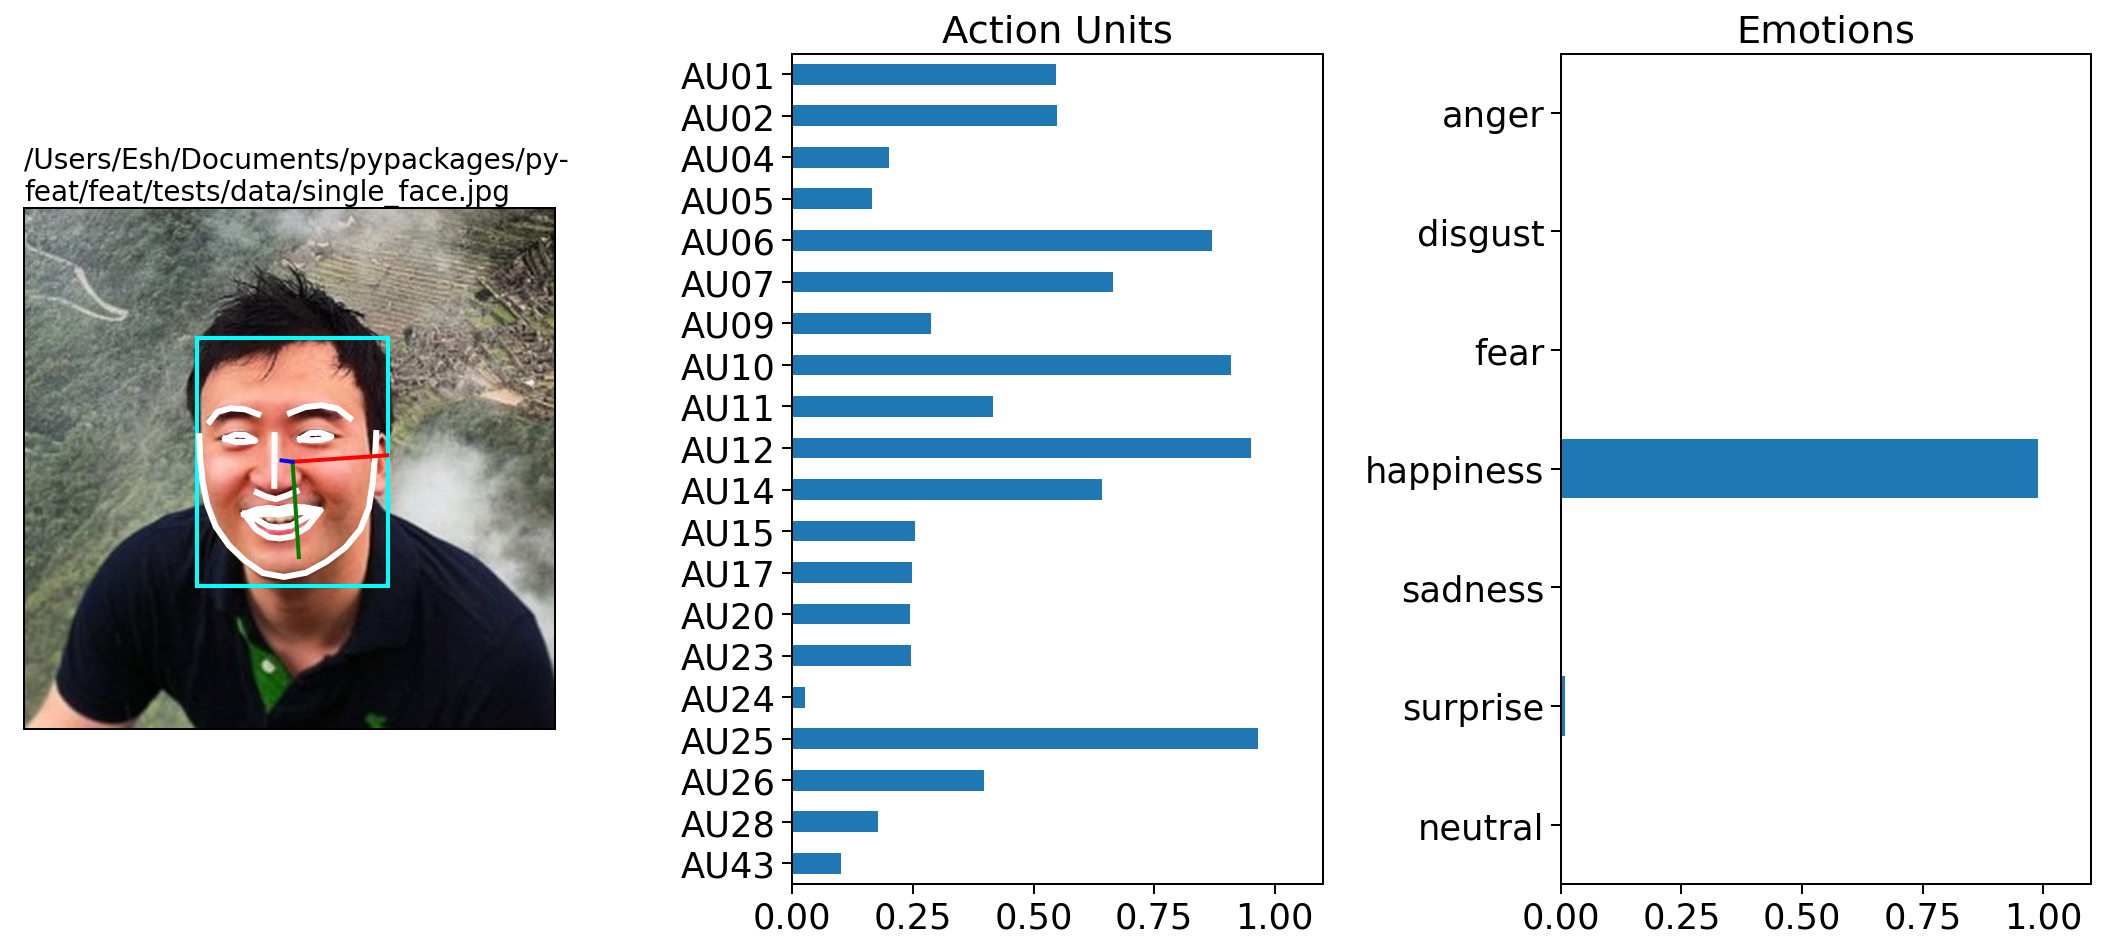

In [32]:
figs = single_face_prediction.plot_detections(poses=True)

By default `.plot_detections()` will overlay facial lines on top of the input image. However, it's also possible to visualize a face using Py-Feat's standardized AU landmark model, which takes the detected AUs and projects them onto a template face. You an control this by change by setting `faces='aus'` instead of the default `faces='landmarks'`. `For more details about this kind of visualization see [tutorial 4](./04_plotting.ipynb):

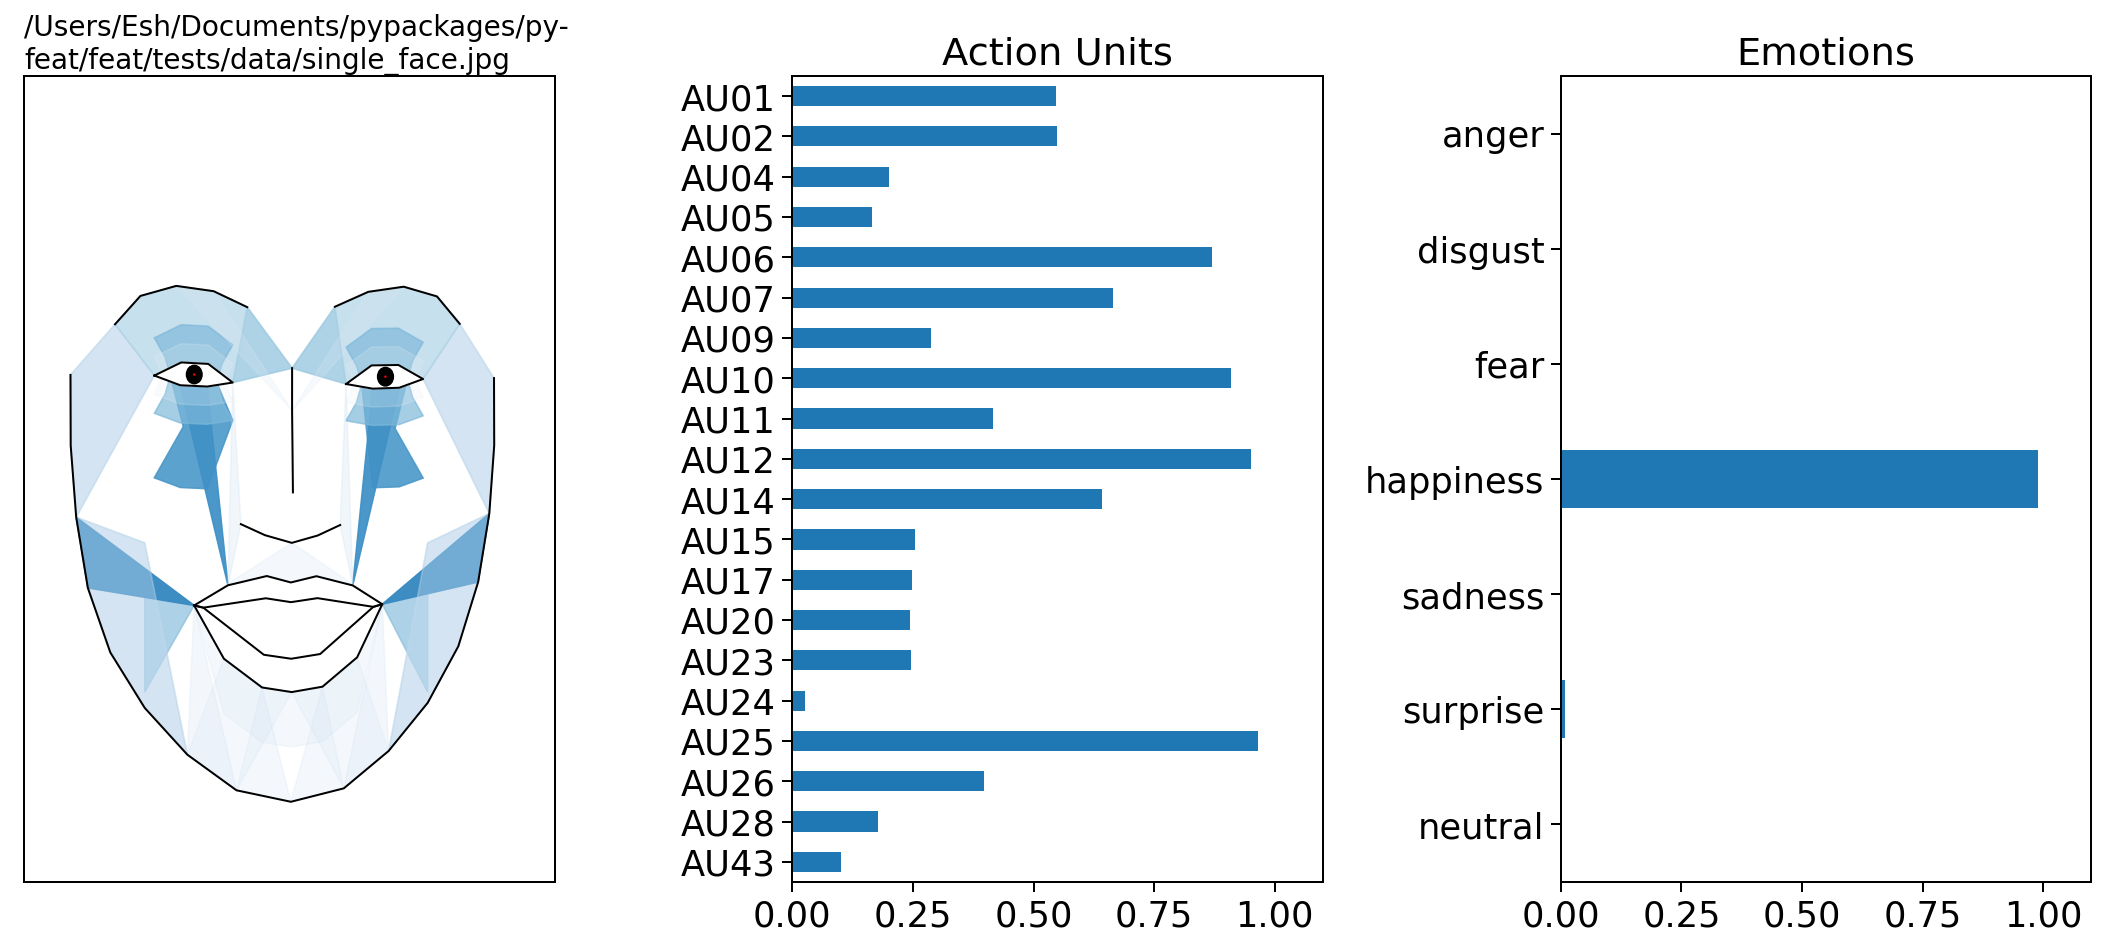

In [33]:
figs = single_face_prediction.plot_detections(faces='aus', muscles=True)

## 2.2 Detecting multiple faces from a single image 

A `Detector` can automatically find multiple faces in a single image. We'll see that in the next example, the number of rows of the Fex data class returned from `.detect_image()` has one row for each detected face. We'll also try using a different model this time, Img2Pose, which acts as both a face detector and a face pose estimator.

Notice how `image_prediction` is now a Fex instance with 5 rows, one for each detected face. We can confirm this by plotting our detection results and poses like before:

In [34]:
multi_face_image_path = os.path.join(test_data_dir, "multi_face.jpg")
multi_face_prediction = detector.detect_image(multi_face_image_path)

# Show results
multi_face_prediction

frame FaceRectX FaceRectY FaceRectWidth FaceRectHeight FaceScore  \
0     0     307.0     230.0         107.0          126.0  0.994716   
1     0     529.0     303.0         110.0          132.0  0.994049   
2     0     676.0     283.0         120.0          140.0  0.993604   
3     0     215.0      45.0         102.0          125.0  0.990833   
4     0     430.0     208.0          85.0          100.0  0.990231   

          x_0         x_1         x_2         x_3  ...       Roll       Yaw  \
0  313.591745  314.818381  317.053333  320.825494  ...  -2.973639 -4.679388   
1  533.995987  532.135572  531.590214  532.290045  ...   4.255018  8.171312   
2  685.718766  684.193948  683.706674  684.644614  ...   9.734623  6.029476   
3  219.544335  217.744293  216.853911  217.271623  ...  14.068047 -4.917797   
4  437.441487  437.595793  438.591793  440.475773  ...   1.971143 -4.030666   

      anger   disgust      fear happiness   sadness  surprise   neutral  \
0  0.033459   0.25794  0.071296  0.180244  0.063566  0.063226  0.330268   
1  0.012756  0.000652  0.077257   0.58086  0.171884  0.009223  0.147367   
2  0.033694  0.002459  0.153587  0.015951  0.566634  0.107269  0.120406   
3  0.005555  0.000543  0.091488  0.044849  0.046434  0.652713  0.158418   
4  0.378602  0.005824  0.005039  0.224923  0.008679  0.155578  0.221355   

                                               input  
0  /Users/Esh/Documents/pypackages/py-feat/feat/t...  
1  /Users/Esh/Documents/pypackages/py-feat/feat/t...  
2  /Users/Esh/Documents/pypackages/py-feat/feat/t...  
3  /Users/Esh/Documents/pypackages/py-feat/feat/t...  
4  /Users/Esh/Documents/pypackages/py-feat/feat/t...  

[5 rows x 173 columns]

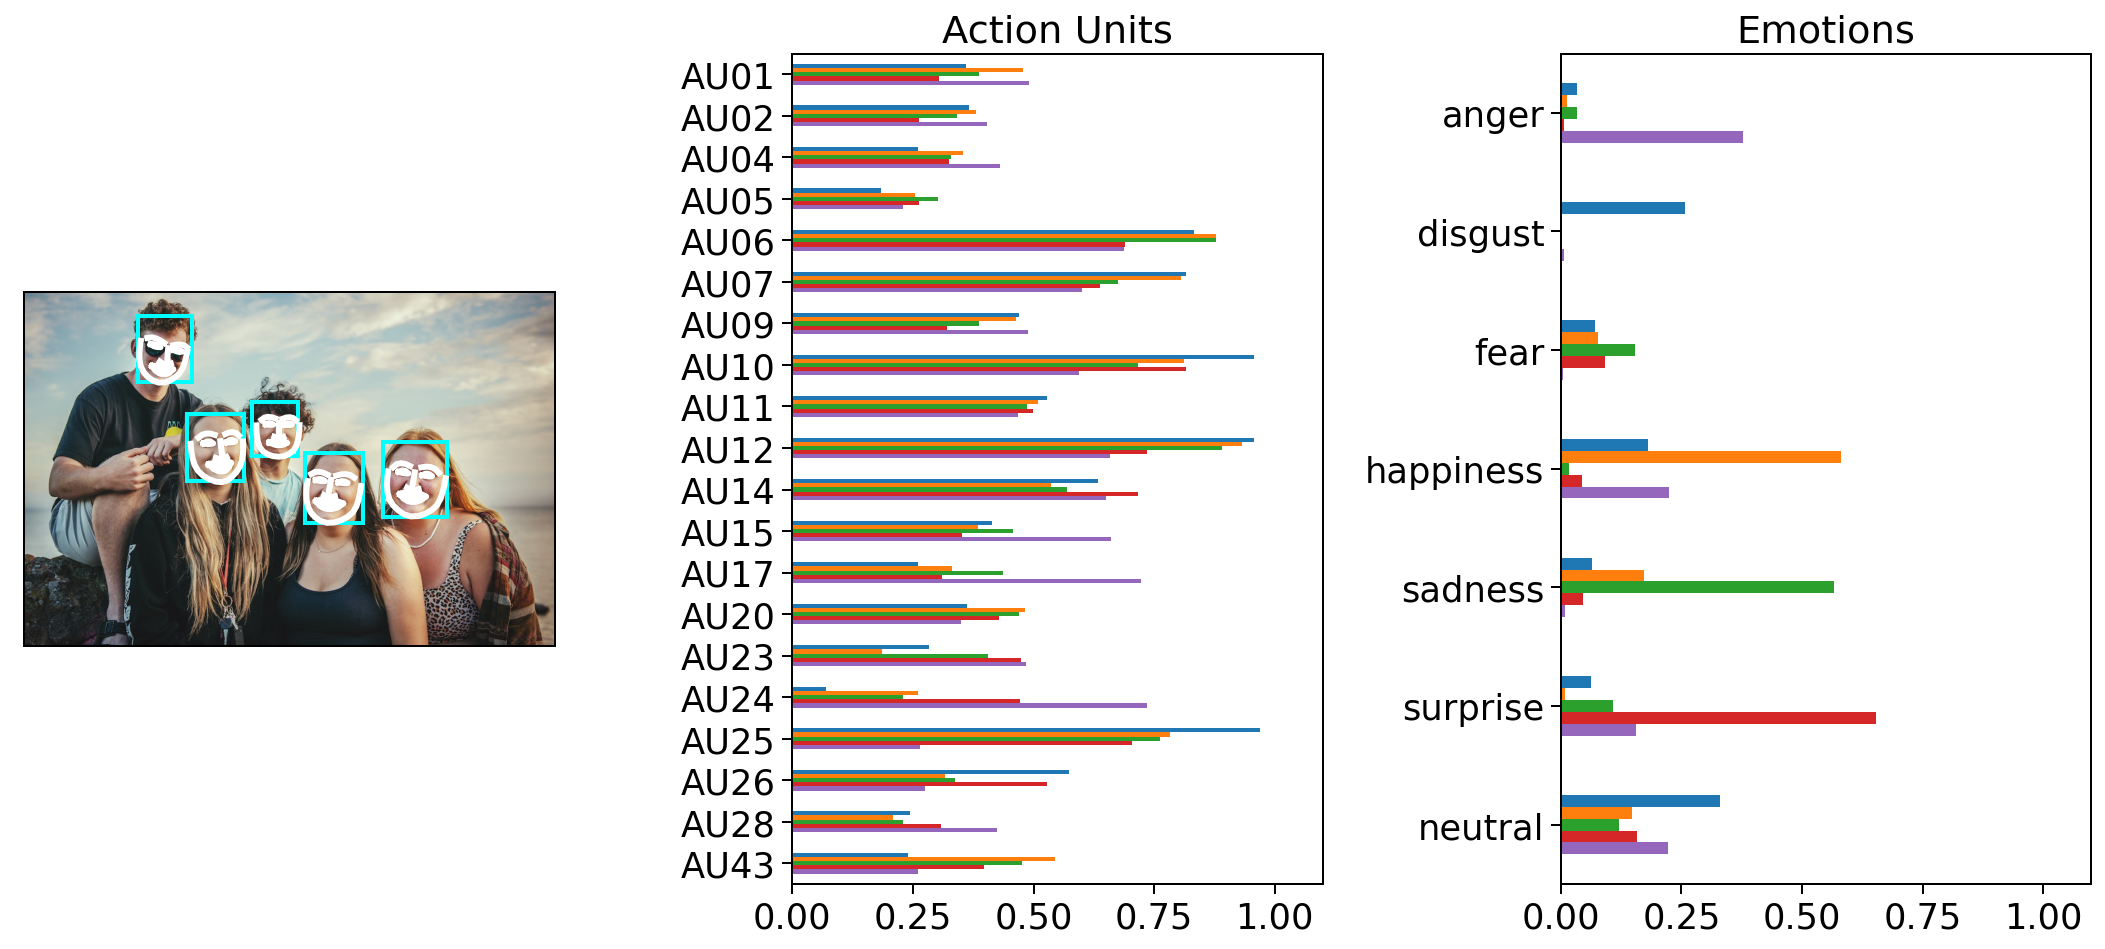

In [35]:
figs = multi_face_prediction.plot_detections(add_titles=False)

## 2.3 Detecting faces from multiple images

`Detector` is also flexible enough to process multiple image files simultaneously if `.detect_image()` is passed a list of images. You can process multiple images in a *batch* to speed up processing, but **all images in a batch must have the same dimensions**.

In the example below we process both our single and multi-face example images from above, but force Py-Feat **not** to batch process them by setting `batch_size = 1`.

Notice how the returned Fex data class instance has 6 rows: 1 for the first face in the first image, and 5 for the faces in the second image:

In [36]:
img_list = [single_face_img_path, multi_face_image_path]

mixed_prediction = detector.detect_image(img_list, batch_size=1)
mixed_prediction

frame FaceRectX FaceRectY FaceRectWidth FaceRectHeight FaceScore  \
0     0     186.0     139.0         206.0          268.0  0.989396   
1     1     307.0     230.0         107.0          126.0  0.994716   
2     1     529.0     303.0         110.0          132.0  0.994049   
3     1     676.0     283.0         120.0          140.0  0.993604   
4     1     215.0      45.0         102.0          125.0  0.990833   
5     1     430.0     208.0          85.0          100.0  0.990231   

          x_0         x_1         x_2         x_3  ...       Roll       Yaw  \
0  188.479571  189.470731  192.234394  197.284821  ...  -3.809027  6.605721   
1  313.591745  314.818381  317.053333  320.825494  ...  -2.973639 -4.679388   
2  533.995987  532.135572  531.590214  532.290045  ...   4.255018  8.171312   
3  685.718766  684.193948  683.706674  684.644614  ...   9.734623  6.029476   
4  219.544335  217.744293  216.853911  217.271623  ...  14.068047 -4.917797   
5  437.441487  437.595793  438.591793  440.475773  ...   1.971143 -4.030666   

      anger   disgust      fear happiness   sadness  surprise   neutral  \
0  0.000224  0.000032  0.000348  0.989694  0.000038  0.009612  0.000053   
1  0.033459   0.25794  0.071296  0.180244  0.063566  0.063226  0.330268   
2  0.012756  0.000652  0.077257   0.58086  0.171884  0.009223  0.147367   
3  0.033694  0.002459  0.153587  0.015951  0.566634  0.107269  0.120406   
4  0.005555  0.000543  0.091488  0.044849  0.046434  0.652713  0.158418   
5  0.378602  0.005824  0.005039  0.224923  0.008679  0.155578  0.221355   

                                               input  
0  /Users/Esh/Documents/pypackages/py-feat/feat/t...  
1  /Users/Esh/Documents/pypackages/py-feat/feat/t...  
2  /Users/Esh/Documents/pypackages/py-feat/feat/t...  
3  /Users/Esh/Documents/pypackages/py-feat/feat/t...  
4  /Users/Esh/Documents/pypackages/py-feat/feat/t...  
5  /Users/Esh/Documents/pypackages/py-feat/feat/t...  

[6 rows x 173 columns]

Calling `.plot_detections()` will now plot detections for all images the detector was passed:

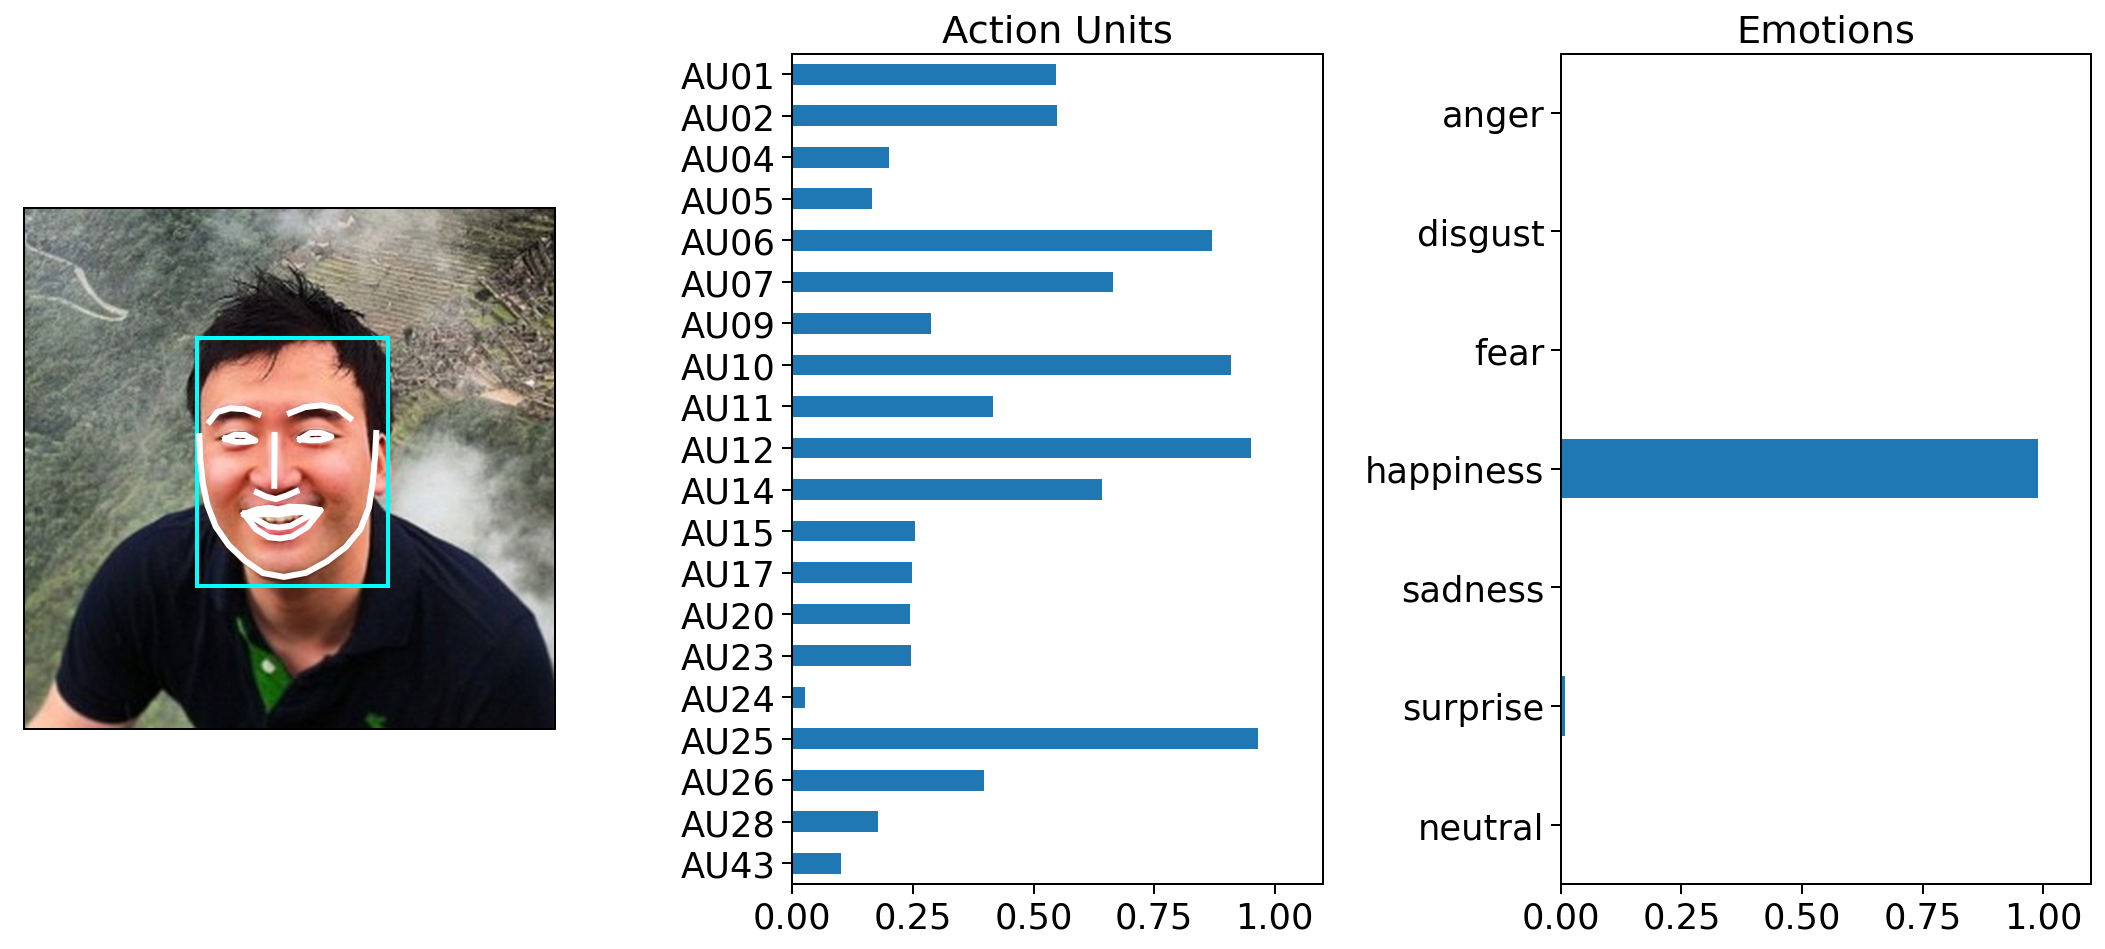

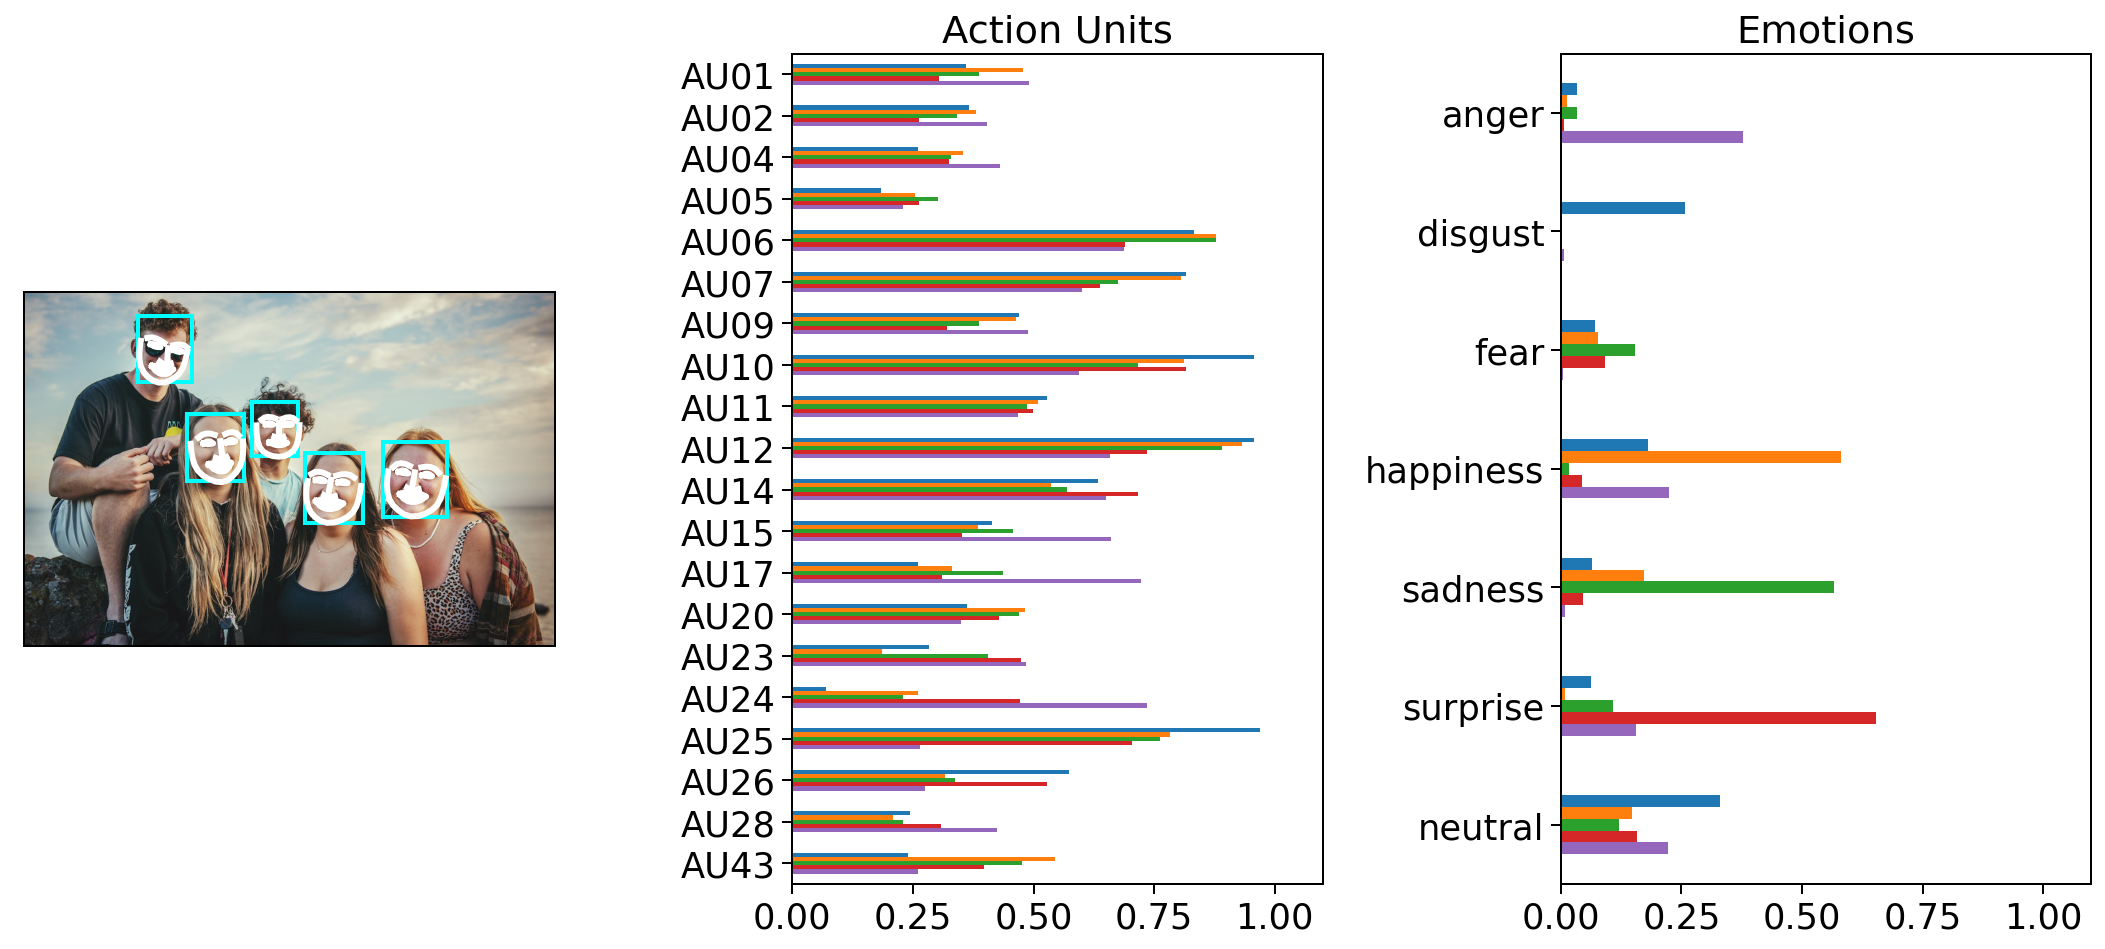

In [37]:
figs = mixed_prediction.plot_detections(add_titles=False)

However, it's easy to use pandas slicing sytax to just grab predictions for the image you want. For example you can use `.loc` and chain it to `.plot_detections()`:

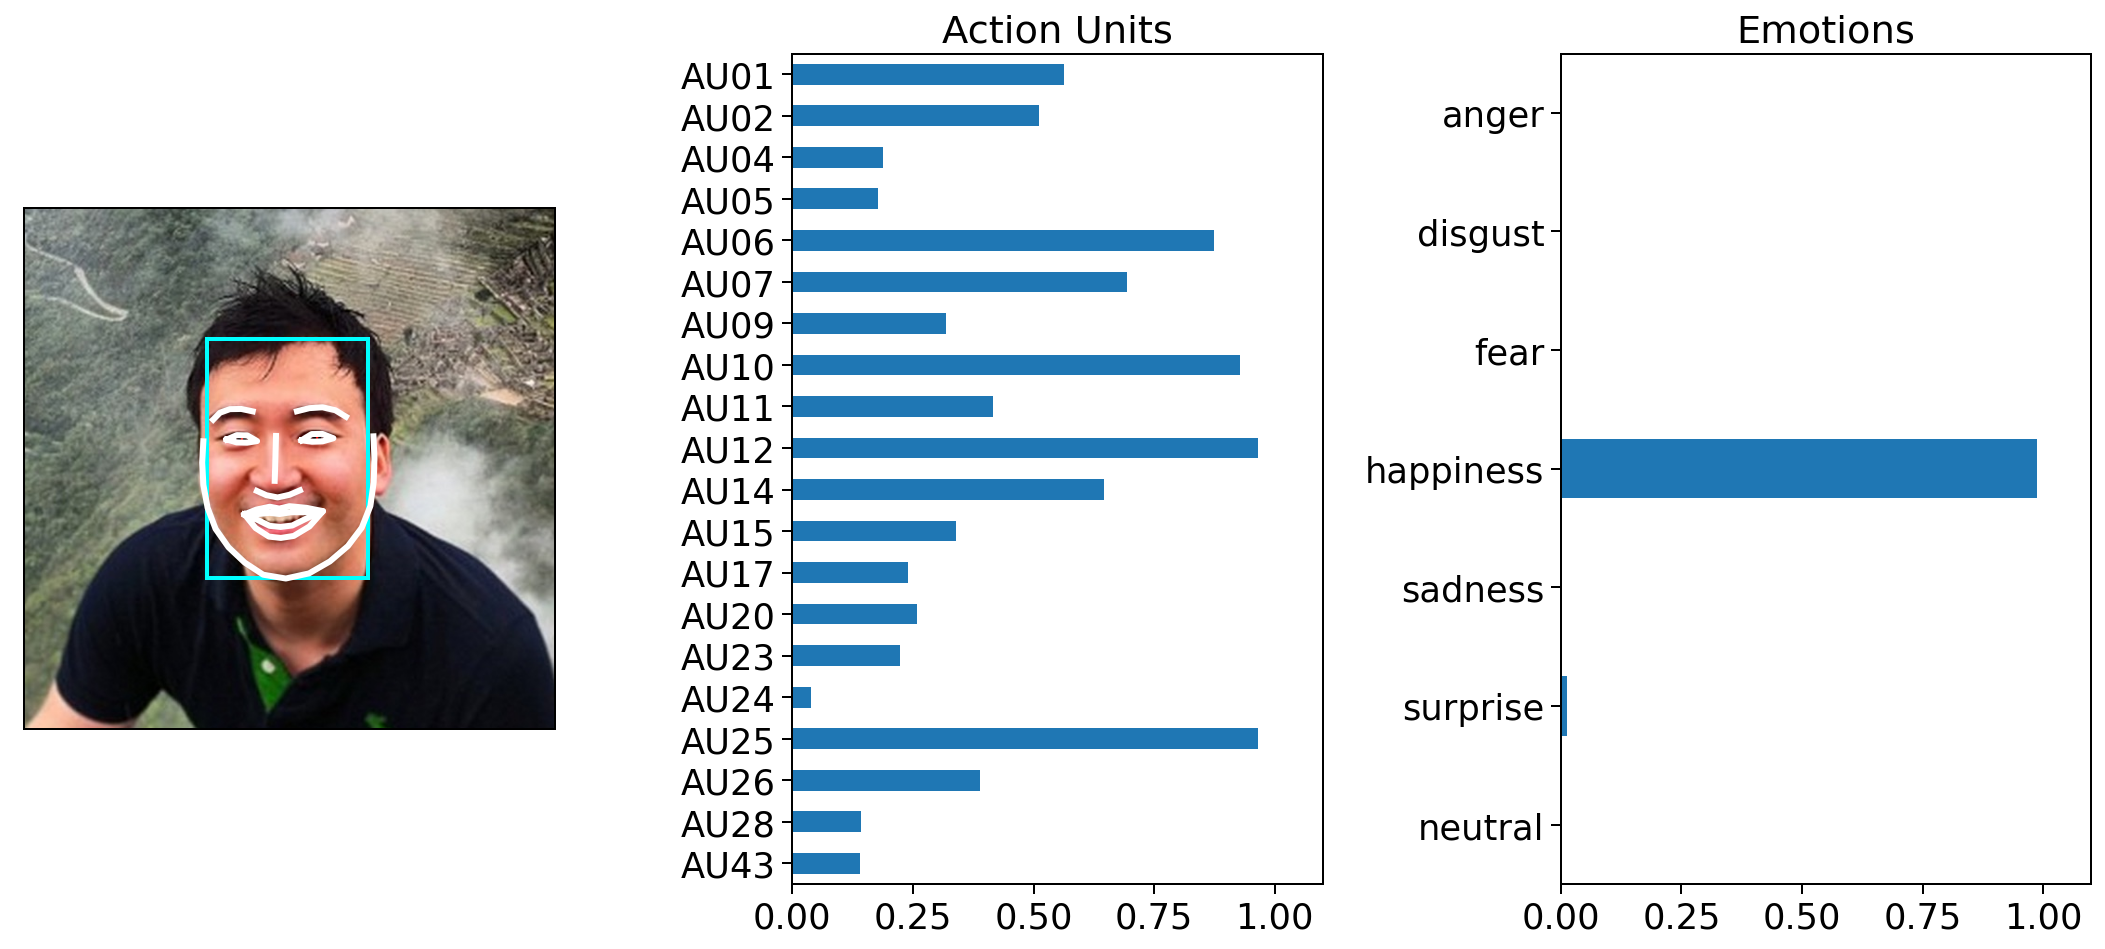

In [25]:
# Just plot the detection corresponding to the first row in the Fex data
figs = mixed_prediction.loc[0].plot_detections(add_titles=False)

Likewise you can use `.query()` and chain it to `.plot_detections()`. `Fex` data classes store each file path in the `'input'` column. So we can use regular pandas methods like `.unique()` to get all the unique images (2 in our case) and pick the second one.

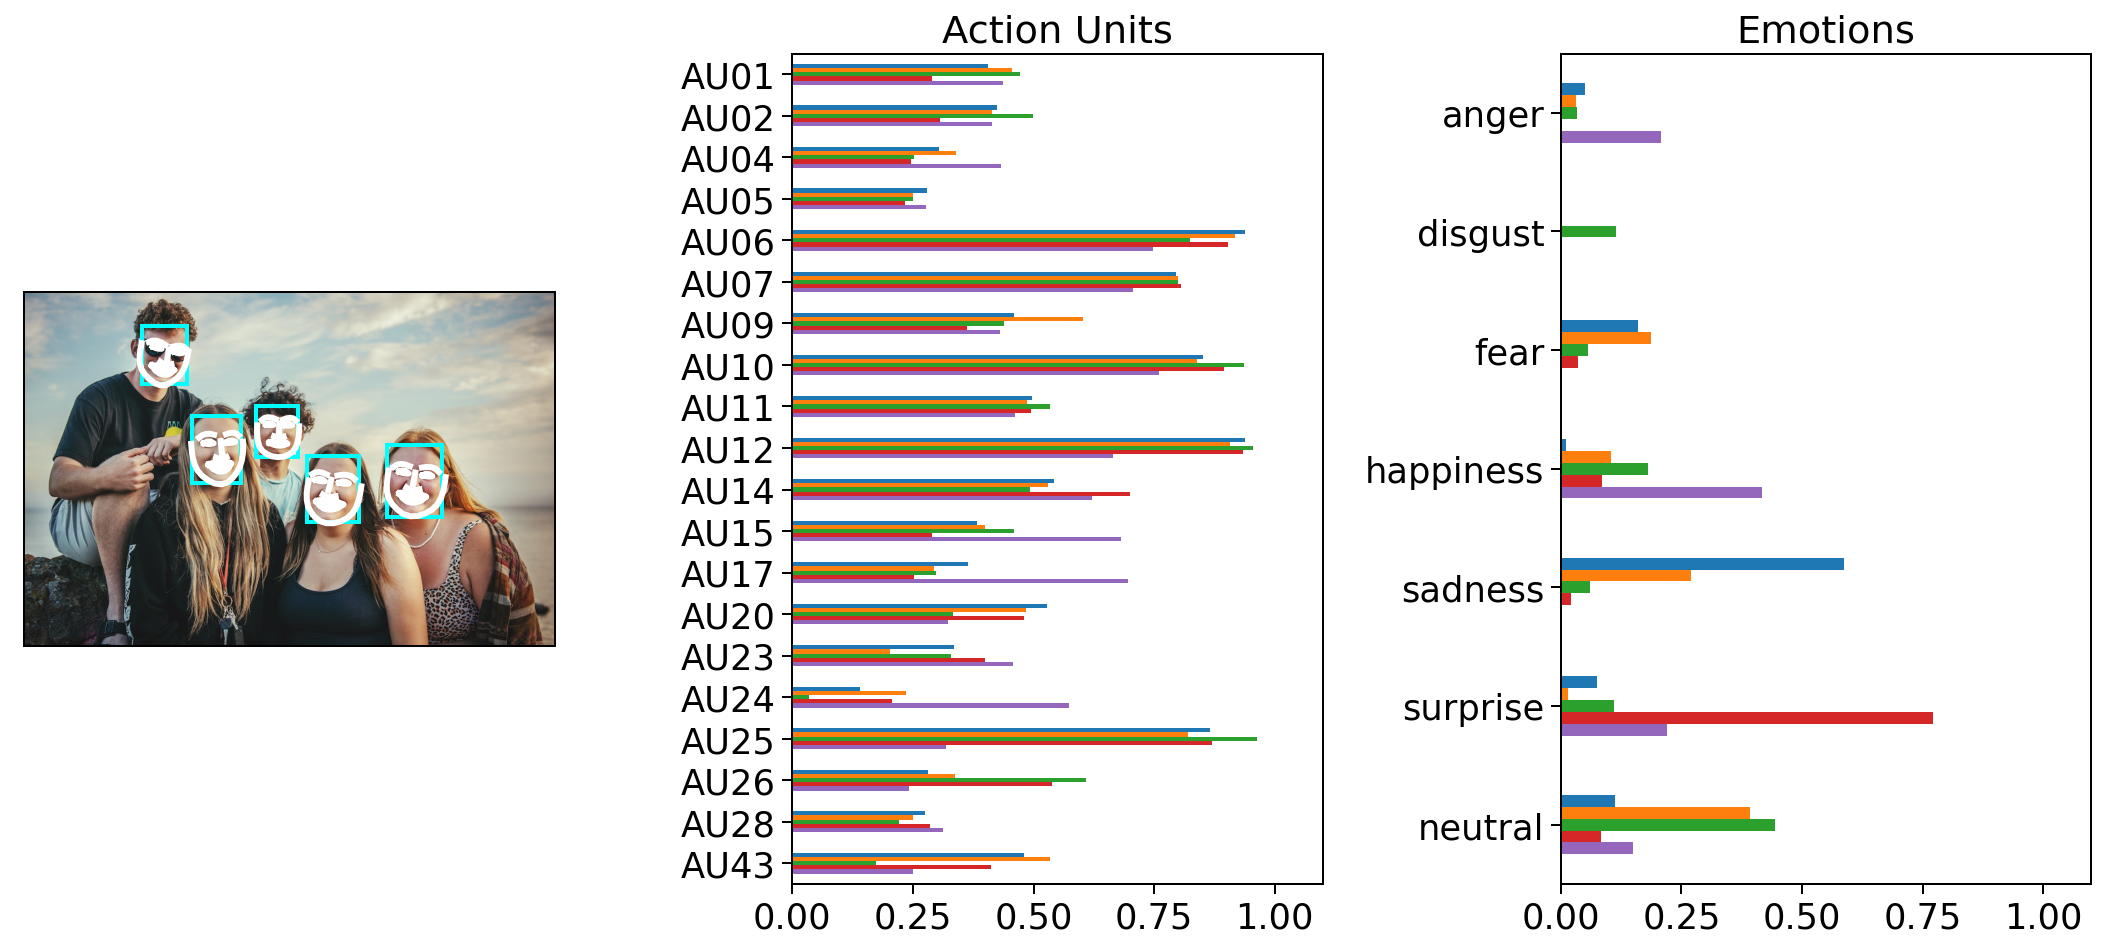

In [26]:
# Choose plot based on image file name
img_name = mixed_prediction['input'].unique()[1]
axes = mixed_prediction.query("input == @img_name").plot_detections(add_titles=False)